In [7]:
from model import ConvNet, Siamese
from dataloader import loadmnist_siamese
from train import TrainConvNet, TrainSiamese

In [8]:
model = Siamese()
trainloader, testloader = loadmnist_siamese(train_batch_size=100, test_batch_size=10)
train_conv = TrainSiamese(model, trainloader, testloader)
train_conv.train(100)

loss =  2.6156189163866777
validation loss =  32.440421214157126
loss =  2.565408634358614
validation loss =  22.68912698869266
loss =  2.149696392503025
validation loss =  24.93339983002109
loss =  1.9107913177641713
validation loss =  16.42927548357271
loss =  1.7371005498657013
validation loss =  18.537386023618396
loss =  1.8188631781275881
validation loss =  21.522619209937478
loss =  2.0228504540034558
validation loss =  17.376955645812213
loss =  1.8583188471271723
validation loss =  16.79185196608808
loss =  1.6962682352333445
validation loss =  17.679279638319876
loss =  1.716095153794974
validation loss =  18.26918597412431
loss =  1.8917014087423825
validation loss =  14.717993330908252
loss =  1.492909804538447
validation loss =  13.445447403626545
loss =  1.5865623818477506
validation loss =  17.36439685525439
loss =  1.5728884586491096
validation loss =  14.199421004618895
loss =  1.4139500817274717
validation loss =  14.740177518729178
loss =  1.7312150453205515
validati

KeyboardInterrupt: 

In [9]:
import numpy as np

features_list = []
labels_list = []
for (data1, data2) in trainloader:
    inputs, labels = data1
    feature = train_conv.model.forward_one(inputs)
    feature = feature.data.numpy()
    features_list.append(feature)
    labels_list.append(labels.data.numpy())

features_list = np.array(features_list).reshape((-1, 128))
labels_list = np.array(labels_list).flatten()

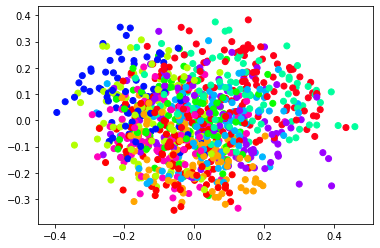

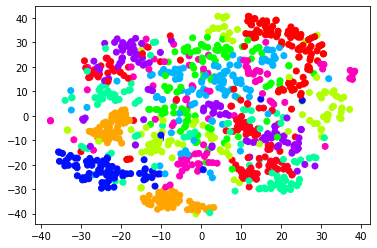

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

pca = PCA(n_components=2)
feature_pca = pca.fit_transform(features_list)

plt.figure()
plt.scatter(feature_pca[:,0], feature_pca[:,1], cmap='hsv', c=labels_list)
plt.show()

tsne = TSNE(n_components=2)
feature_tsne = tsne.fit_transform(features_list)

plt.figure()
plt.scatter(feature_tsne[:,0], feature_tsne[:,1], cmap='hsv', c=labels_list/max(labels_list))
plt.show()